Sequential Workflows in LangGraph | Agentic AI using LangGraph | Video 5 

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
# define state
class BMIState(TypedDict):

    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [3]:
def calculate_bmi(state: BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi, 2)

    return state

In [4]:
def label_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state

In [8]:
# define your graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)


# compile the graph
workflow = graph.compile()

In [9]:
# execute the graph
intial_state = {'weight_kg':80, 'height_m':1.73}

final_state = workflow.invoke(intial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


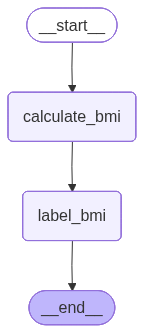

In [10]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
model = ChatOpenAI()